**Based on Notebook from Aurelien Geron**

**Hands-on ML with Scikit-Learn & Tensorflow**

**Chapter 6 – Decision Trees**


## 0.  Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


## 1. Visualizing Data

Text(0, 0.5, 'Petal width')

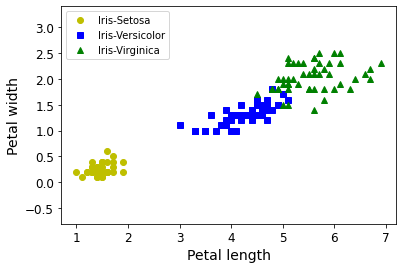

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.axis('equal')
plt.legend()
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

## 2. Classification Decision Tree
### 2.1 Training

Run the following blocks to train a decision train

**Questions:** 
- How is the training actually done?
- Look at the documentation of the DecisionTree, can you relate the availabe parameters to the concepts seen during the lecture?

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Save a visualization of the tree in file iris_tree.dot
Visualize it online for instance copying the text inside the saved file into https://dreampuf.github.io/GraphvizOnline/

In [4]:
export_graphviz(
        tree_clf,
        out_file="./iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

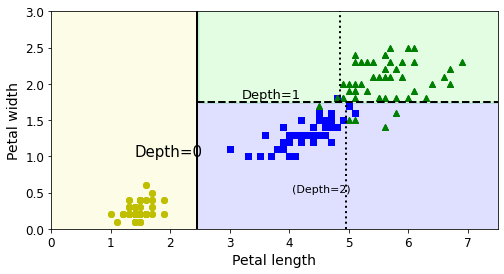

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):

    # Take a dense grid of points 100 x 100
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Make a prediction for every point on the grid
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Define colors for the three classes
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    # Draw prediction surfaces
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)#, linewidth=10)

    # Define colors and draw prediction surfaces (useful for other datasets)
    if not iris: 
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    # plot training points 
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)

    # name axis
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

#Manually draw the decision lines, the values were taken from the saved tree
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### 2.2. Predicting classes and class probabilities

**Questions**: 
Explain the prediction step and the difference between the following lines

In [6]:
print(tree_clf.predict_proba([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]


In [7]:
print(tree_clf.predict([[5, 1.5]]))


[1]


### 2.3 Two moons dataset 
**Question:** Try different values of depth and min_samples_leaf

- In which regions do new splits appear?
- What happens with the splits as depth increases?
- What happens with the splits as min_samples_leaf decreases?

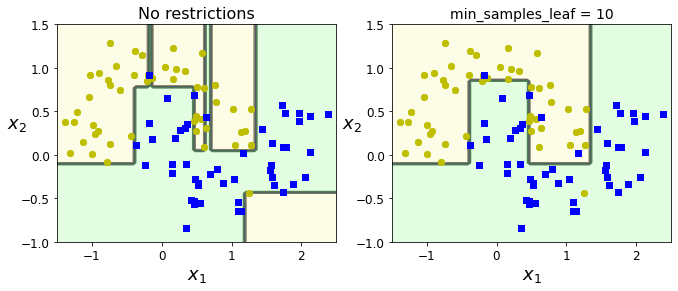

In [20]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## 3. Regression Decision Tree

The following code creates two regression trees with different depths (first cell) or different number of minimum samples per leave. Visualize the graphs

**Question** 
- which setting seems more reasonable in each case, why?
- what are the main differences in training and making predictions with a regression tree vs a classification tree?

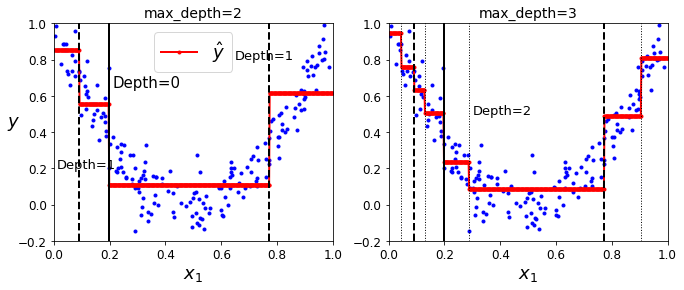

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Creating a quadratic training set + noise
rnd.seed(42)
m = 200
X = rnd.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + rnd.randn(m, 1) / 10

# Create two trees with different depths
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Create function to plot predictions for regression
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    #create points where to evaluate the predictions of the trained trees
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    
    #make predictions
    y_pred = tree_reg.predict(x1)
    
    #create axis
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)

    #Plot provided training points X,y as blue points
    plt.plot(X, y, "b.")
    
    #Plot predictions for the linspace
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

# Create figure 
plt.figure(figsize=(11, 4))

# Plot the predictiosn for the first tree
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)

# Annotate the plot with text
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# Plot the predictions for the second tree
plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)

# Annotate the plot with text
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [10]:
export_graphviz(
        tree_reg1,
        out_file="./regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

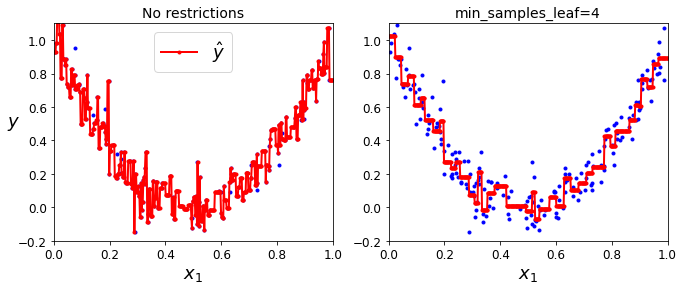

In [24]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=4)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()